<a href="https://colab.research.google.com/github/rineeee/CNN/blob/main/AI%EC%84%B8%EC%85%98_%EC%8B%A4%EC%8A%B5_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KUSITHM AI 세션 실습

## 0. 필요한 이미지 파일, 폴더 준비하기

In [ ]:
from google.colab import files
uploaded = files.upload()

!mkdir trainSet trainSet/bicycle trainSet/car
!mkdir testSet testSet/bicycle testSet/car
!mv train_bicycle* trainSet/bicycle
!mv train_car* trainSet/car
!mv test_bicycle* testSet/bicycle
!mv test_car* testSet/car

Saving test_bicycle_1 - 복사본 (2).jpg to test_bicycle_1 - 복사본 (2).jpg
Saving test_bicycle_1 - 복사본.jpg to test_bicycle_1 - 복사본.jpg
Saving test_bicycle_1.jpg to test_bicycle_1.jpg
Saving test_bicycle_2 - 복사본 (2).jpg to test_bicycle_2 - 복사본 (2).jpg
Saving test_bicycle_2 - 복사본.jpg to test_bicycle_2 - 복사본.jpg
Saving test_bicycle_2.jpg to test_bicycle_2.jpg
Saving test_bicycle_3 - 복사본.jpg to test_bicycle_3 - 복사본.jpg
Saving test_bicycle_3.jpg to test_bicycle_3.jpg
Saving test_bicycle_4.jpg to test_bicycle_4.jpg
Saving test_bicycle_5.jpg to test_bicycle_5.jpg
Saving test_bicycle_6.jpg to test_bicycle_6.jpg
Saving test_bicycle_7.jpg to test_bicycle_7.jpg
Saving test_bicycle_8.jpg to test_bicycle_8.jpg
Saving test_bicycle_9.jpg to test_bicycle_9.jpg
Saving test_bicycle_10.jpg to test_bicycle_10.jpg
Saving test_car_1.jpg to test_car_1.jpg
Saving test_car_2.jpg to test_car_2.jpg
Saving test_car_3.jpg to test_car_3.jpg
Saving test_car_4.jpg to test_car_4.jpg
Saving test_car_5.jpg to test_car_5.jpg
Sa

## 1. 필요한 라이브러리 가져오기

    
- torch : 파이토치를 위함, 인공지능과 관련된 함수들 포함    
- torchvision : 데이터셋, 이미지 다루기
- numpy : 배열을 다루기  
- matplotlib.pyplot : 그래프(이미지) 출력  
- %matplotlib inline : matplotlib.pyplot의 출력 이미지를 코드 내부에 띄우는 역할 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision
from torchvision import transforms

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### GPU 사용하기

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

#random value 고정a
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

### 이미지 출력 함수

In [ ]:
def imshow(img): 
    img = img.numpy()    #tensor형태의 이미지를 배열(array)로 전환
    plt.imshow(np.transpose(img, (1, 2, 0))) 
    plt.show()

---
## 2. 훈련용 이미지(폴더) 가져오기

### 폴더 전체 불러오기 (사이즈 변환, 텐서로 변환)

In [ ]:
trans = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

train_data = torchvision.datasets.ImageFolder(root = 'trainSet', transform = trans)
train_loader = DataLoader(dataset = train_data,
                       batch_size = 8,
                       shuffle = True
		)

### 테스트 데이터 불러오기

In [ ]:
test_data = torchvision.datasets.ImageFolder(root = 'testSet', transform = trans)
test_loader = DataLoader(dataset = test_data,
                       batch_size = len(test_data),
                       shuffle = True
		)

### train_loader 정보 확인  
train_loader.dataset

In [ ]:
train_loader.dataset

Dataset ImageFolder
    Number of datapoints: 70
    Root location: trainSet
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=PIL.Image.BILINEAR)
               ToTensor()
           )

##   
---
## 3. CNN모델 구현하기

### CNN class 작성하기
![python image](https://taewanmerepo.github.io/2018/01/cnn/head.png)   

#### layer 1, 2
- nn.Conv2d(in_channels, out_channels, kernel_size, stride = 1, padding = 0)     
- nn.ReLU()
- nn.MaxPool2d(kernel_size)  

#### layer 3  
- nn.Linear(in_features, out_features)  
- nn.ReLU()  
- nn.Linear(in_features, out_features)  

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer1 =nn.Sequential(
        nn.Conv2d(3,6,5),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(6,16,5),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.layer3 = nn.Sequential(
        nn.Linear(16*29*29,120),
        nn.ReLU(),
        nn.Linear(120,2)
    )

  def forward(self,x):
     out=self.layer1(x)
     out=self.layer2(out)
     out=out.view(out.shape[0],-1)
     out=self.layer3(out)
     return out

### 손실 함수와 Optimizer 정의하기

In [ ]:
net = CNN().to(device)
optimizer = optim.Adam(net.parameters(), lr = 0.00001)
loss_func = nn.CrossEntropyLoss().to(device)

total_batch = len(train_loader)

---
## 4. 훈련시키기

### epochs : 훈련 횟수

In [ ]:
epochs = 10
for epoch in range(epochs):
    avg_cost = 0.0
    for num, data in enumerate(train_loader):
        imgs, labels = data
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        out = net(imgs)
        loss = loss_func(out, labels)
        loss.backward()
        optimizer.step()
        avg_cost += loss / total_batch
        
    print('[Epoch:{}] cost = {}'.format(epoch+1, avg_cost))
        
print('Learning Finished!')

[Epoch:1] cost = 0.6959398984909058
[Epoch:2] cost = 0.6926010847091675
[Epoch:3] cost = 0.6904022693634033
[Epoch:4] cost = 0.6879149079322815
[Epoch:5] cost = 0.686039388179779
[Epoch:6] cost = 0.6843391060829163
[Epoch:7] cost = 0.6821738481521606
[Epoch:8] cost = 0.68085777759552
[Epoch:9] cost = 0.677871823310852
[Epoch:10] cost = 0.675947904586792
Learning Finished!


---
## 5. 정확도 테스트

### 테스트 시작!

In [ ]:
correct=0
total =0
with torch.no_grad():
  for data in test_loader:
    images, labels =data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct +=(predicted ==labels).sum().item()

print('Accuracy : %d %%'%(100*correct/total))    

Accuracy : 80 %


### 예측한 결과와 정답 비교

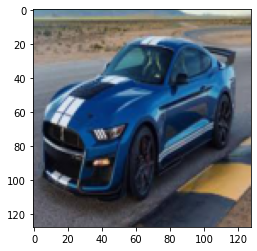

예측 :자동차,정답:자동차


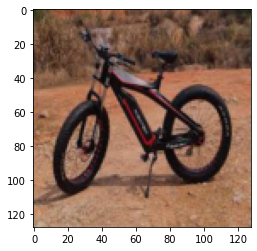

예측 :자전거,정답:자전거


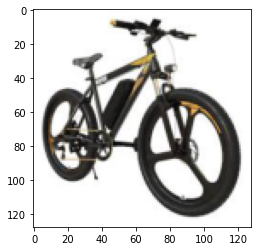

예측 :자전거,정답:자전거


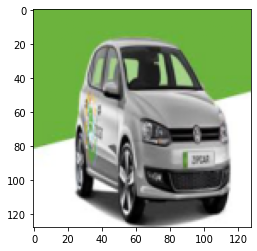

예측 :자전거,정답:자동차


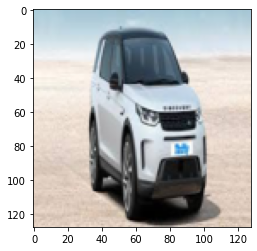

예측 :자전거,정답:자동차


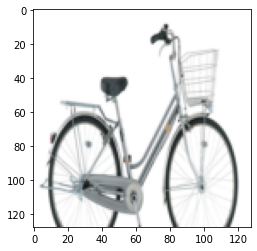

예측 :자전거,정답:자전거


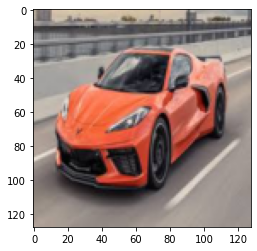

예측 :자전거,정답:자동차


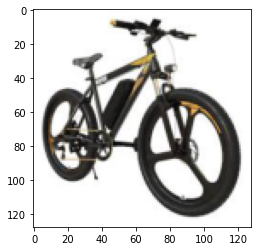

예측 :자전거,정답:자전거


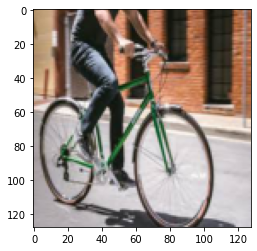

예측 :자전거,정답:자전거


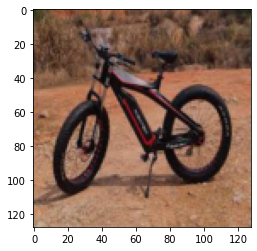

예측 :자전거,정답:자전거


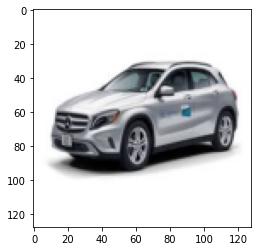

예측 :자동차,정답:자동차


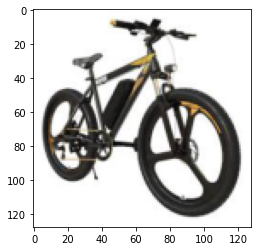

예측 :자전거,정답:자전거


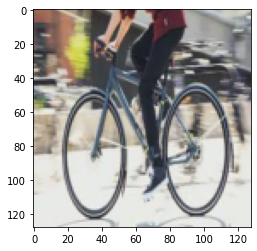

예측 :자전거,정답:자전거


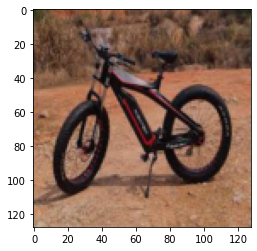

예측 :자전거,정답:자전거


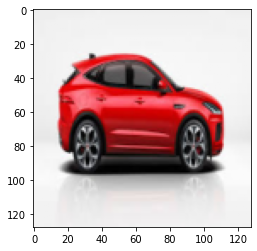

예측 :자동차,정답:자동차


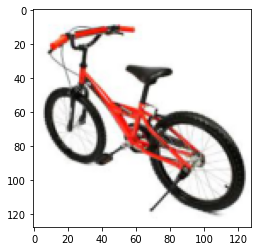

예측 :자전거,정답:자전거


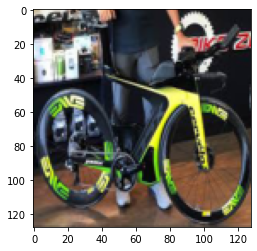

예측 :자전거,정답:자전거


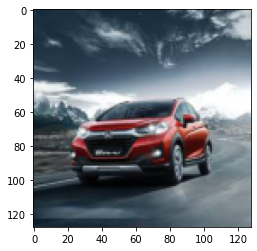

예측 :자동차,정답:자동차


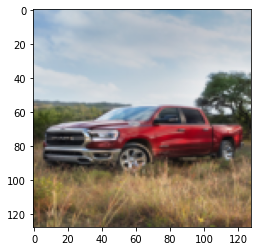

예측 :자전거,정답:자동차


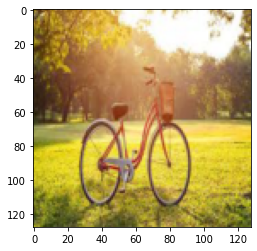

예측 :자전거,정답:자전거


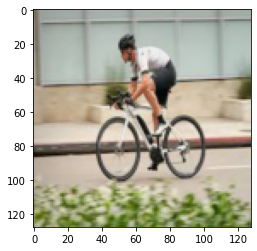

예측 :자전거,정답:자전거


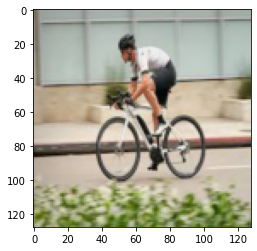

예측 :자전거,정답:자전거


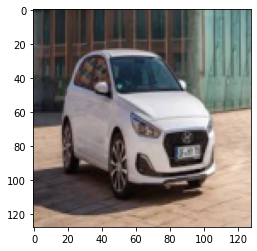

예측 :자전거,정답:자동차


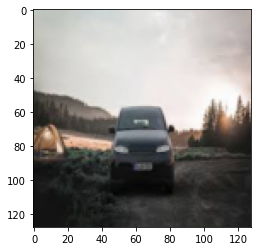

예측 :자동차,정답:자동차


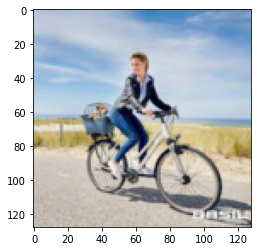

예측 :자전거,정답:자전거


In [ ]:
classes = ["자전거","자동차"]

for i in range(0,len(test_data)):
  imshow(images[i])
  print("예측 :" +classes[predicted[i]]+",정답:"+classes[labels[i]])